### Cleaning and EDA

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
import re
import logging, os
import time
from tqdm import tqdm

import tensorflow as tf
import keras                                               
from keras.models import Model, save_model
from keras.models import Sequential
#**Import from keras_preprocessing not from keras.preprocessing**
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import regularizers, optimizers, applications
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop, Adam 
from tensorflow.keras import layers
#import tensorflow_addons as tsa
#from tensorflow_addons.optimizers import AdamW 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# print out how many GPUs are available
import tensorflow as tfprint("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  5


### Aptos 2019 Dataset

In [12]:
aptos = pd.read_csv('../aptos_2019_train.csv')
aptos.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


<Axes: xlabel='diagnosis'>

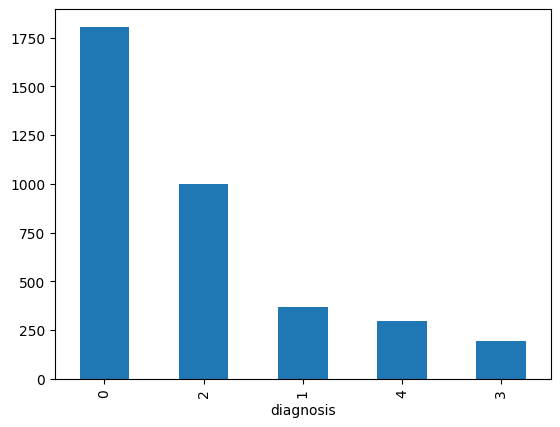

In [13]:
aptos.diagnosis.value_counts().plot(kind='bar')

In [15]:
train_images = "../train_EVERYTHING/"

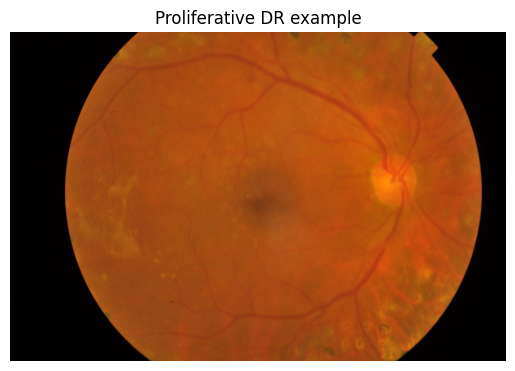

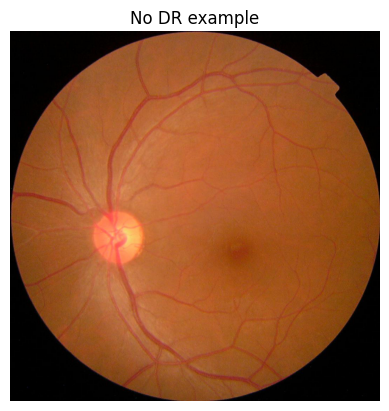

In [16]:

img = load_img(train_images +  aptos['id_code'].iloc[1] +".png")
plt.imshow(img)
plt.title('Proliferative DR example')
plt.axis("off")
plt.show()
img = load_img(train_images +  aptos['id_code'].iloc[3] +".png")
plt.imshow(img)
plt.title('No DR example')
plt.axis("off")
plt.show()

In [17]:
aptos.diagnosis = aptos.diagnosis.astype(str)

type(aptos.diagnosis.iloc[0])

str

In [18]:
aptos['diagnosis'].value_counts()

diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64